# Classifier & Regressor



## Module 2

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as skmu
from math import sqrt
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

### Dataframes 

In [2]:
train = pd.read_csv("Data/TrainingData.csv", encoding = "utf-8")
test = pd.read_csv("Data/TestData.csv", encoding = "utf-8")
train_X = train[[ 'Quarter' ,'Year' ,'Month' , 'DayofMonth','OriginAirportID','CRSDepTime', 'DepDelayMinutes', 'DestAirportID','CRSArrTime', 'windspeedKmph_x','winddirDegree_x','precipMM_x','visibility_x','pressure_x','cloudcover_x','DewPointF_x','WindGustKmph_x','humidity_x','windspeedKmph_y','winddirDegree_y','precipMM_y','visibility_y','pressure_y','cloudcover_y','DewPointF_y','WindGustKmph_y','humidity_y']].to_numpy()
test_X = test[[ 'Quarter' ,'Year' ,'Month' , 'DayofMonth','OriginAirportID','CRSDepTime', 'DepDelayMinutes', 'DestAirportID','CRSArrTime', 'windspeedKmph_x','winddirDegree_x','precipMM_x','visibility_x','pressure_x','cloudcover_x','DewPointF_x','WindGustKmph_x','humidity_x','windspeedKmph_y','winddirDegree_y','precipMM_y','visibility_y','pressure_y','cloudcover_y','DewPointF_y','WindGustKmph_y','humidity_y']].to_numpy()

In [3]:
cltrain_Y = train[['ArrDel15']].values.ravel()
clactual_Y = test[['ArrDel15']].values.ravel()

### Classifier

In [4]:
classifierxgb = XGBClassifier(n_estimators=200, tree_method='gpu_hist', predictor='gpu_predictor')
classifierxgb.fit(train_X, cltrain_Y)
clpred_Yxgb = classifierxgb.predict(test_X)

In [5]:
print(skmu.classification_report(clactual_Y, clpred_Yxgb))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     40606
         1.0       0.90      0.70      0.79     10815

    accuracy                           0.92     51421
   macro avg       0.91      0.84      0.87     51421
weighted avg       0.92      0.92      0.92     51421



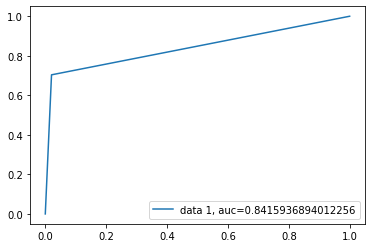

In [6]:
fpr, tpr, _ = skmu.roc_curve(clactual_Y, clpred_Yxgb)
auc = skmu.roc_auc_score(clactual_Y, clpred_Yxgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [7]:
classifierlog = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=3000)
classifierlog.fit(train_X, cltrain_Y)
clpred_Ylog = classifierlog.predict(test_X)

In [8]:
print(skmu.classification_report(clactual_Y, clpred_Ylog))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     40606
         1.0       0.89      0.69      0.78     10815

    accuracy                           0.92     51421
   macro avg       0.91      0.83      0.86     51421
weighted avg       0.91      0.92      0.91     51421



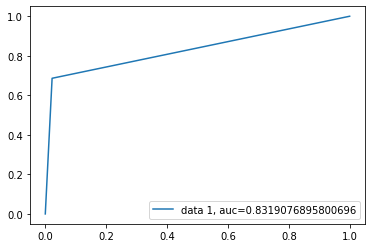

In [9]:
fpr, tpr, _ = skmu.roc_curve(clactual_Y, clpred_Ylog)
auc = skmu.roc_auc_score(clactual_Y, clpred_Ylog)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [10]:
classifiertrees = ExtraTreesClassifier(n_estimators = 50, random_state = 0)
classifiertrees.fit(train_X, cltrain_Y)
clpred_Ytree = classifiertrees.predict(test_X)

In [11]:
print(skmu.classification_report(clactual_Y, clpred_Ytree))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     40606
         1.0       0.86      0.67      0.76     10815

    accuracy                           0.91     51421
   macro avg       0.89      0.82      0.85     51421
weighted avg       0.91      0.91      0.91     51421



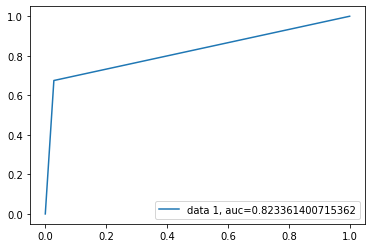

In [12]:
fpr, tpr, _ = skmu.roc_curve(clactual_Y, clpred_Ytree)
auc = skmu.roc_auc_score(clactual_Y, clpred_Ytree)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
classifierada = AdaBoostClassifier(n_estimators=70)
classifierada.fit(train_X, cltrain_Y)
clpred_Yada = classifierada.predict(test_X)

In [16]:
print(skmu.classification_report(clactual_Y, clpred_Yada))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     40606
         1.0       0.89      0.69      0.78     10815

    accuracy                           0.92     51421
   macro avg       0.91      0.83      0.86     51421
weighted avg       0.92      0.92      0.91     51421



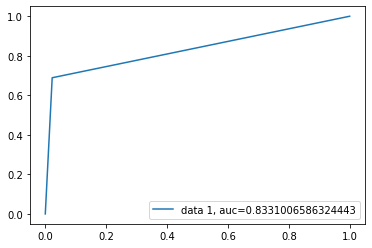

In [17]:
fpr, tpr, _ = skmu.roc_curve(clactual_Y, clpred_Yada)
auc = skmu.roc_auc_score(clactual_Y, clpred_Yada)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Classifier Metrics

In [ ]:
"""
ROC-AUC Curve metric analysis shows that the extra trees classifier provides the best prediction of the test 
dataset provided.
Greater the AUC value Greater will be the ability of the model to predict the 0s as 0s and 1s as 1s.
AUC of XG Boost is greatest
The Classification result supports the claim
"""

### Storing Classified Flights

In [18]:
test.loc[:,'ArrDel15'] = clpred_Yxgb
test = test[(test.ArrDel15 == 1)]
test.to_csv("Data/ClassifiedFlights.csv", index = False, encoding = 'utf-8')